# Generalize the CCT1 function to accomplish the following:
   
1. Launch a bomb from an arbitrary point ($x_i$, $y_i$, $z_i$).   
2. Launch a bomb with a velocity $v_i$, an angle $\psi$ from horizontal, and an azimuth (math azimuth) $\theta$ (note that angle's symbol has changed from CCT1).   
3. Specify the lowest $z$ value, $z_{floor}$, on which the trajectory will be calculated.    
4. Specify the number of discretization, $n$.   



# Breaking it down:

1. Calculate how far from the launch point (in radius, not in $x$ and $y$) the trajectory $z$ is equal to $z_{floor}$. Call this radius$_{max}$.    
2. Discretize the distance between radius = 0 and radius = radius$_{max}$.   
3. Calculate the values of $x$ and $y$ along the discretized version of radius 0 to radius$_{max}$.   
4. Calculate the values of $z$ based on $x$ and $y$.   

```
def trajectory3d(x_i, y_i, z_i, v_i, theta, psi, z_floor=0, g=9.81, n=100):   
    """ Write comments here"""   
    return x, y, z
    
```
Where (mathematical symbols in parenthesis):   
`_i` ($_i$) is the initial condition   
`v` ($v$) is the velocity   
`g` ($g$) is constant gravity     
`psi` ($\psi$) is the launch angle from horizontal (i.e. the angle between the $xy$ plane and $z$)   
`theta` ($\theta$) is the azimuth (the angle between $x$ and $y$)   
`x` ($x$) is the E-W distance   
`y` ($y$) is the N-S distance   
`z` ($z$) is the altitude   
`z_floor` ($z_{floor}$) is the lowest possible value of altitude of the trajectory   
`r` ($r$) is the radius   
`r_max` ($r_{max}$) is the maximum radius of the ballistic   



# Derivation:

In x-z coordinates we originally defined $z$ as   

$z = \frac{2 x}{v_i \cos\psi} \left(v_i \sin\psi - \frac{g x}{v_i \cos\psi}\right)$   

Next, we consider x-y-z coordinates. Let $r$ be a radial coordinate direction that is aligned with $\theta$ (the launch azimuth), and let $(x_i, y_i, z_i)$ be the launch position. Our initial equation becomes   

$z(r) = z_i + \frac{2 r}{v_i \cos\psi} \left(v_i \sin\psi - \frac{g r}{v_i \cos\psi}\right)$   

in which in planview our trajectory takes the coordinates   

$x(r) = x_i + r \cos\theta$   

and   

$y(r) = y_i + r \sin\theta$   
  

Given that we want to define trajectories to only the minimum elevation $z_{floor}$, we determine $r_{max}$ such that

$z(r_{max}) = z_{floor}$   

or   

$z_{floor} = z_i + \frac{2 r_{max}}{v_i \cos\psi} \left(v_i \sin\psi - \frac{g r_{max}}{v_i \cos\psi}\right)$   

By subtracting $z_{floor}$ and distributing, we find that      

$0 = (z_i - z_{floor}) + \frac{2 v_i \sin\psi r_{max}}{v_i \cos\psi} - \left(\frac{g r_{max}}{v_i \cos\psi}\right) \left(\frac{2 r_{max}}{v_i \cos\psi}\right)$   

which simplifies to

$0 = (z_i - z_{floor}) + {2 \tan\psi r_{max}} - \frac{2 g (r_{max})^2}{v_i^2 \cos^2\psi}$   

The quadratic formula can then be used to solve for $r_{max}$.




The quadratic formula is

$\frac{-{\color{green}b} \pm \sqrt{{\color{green}b}^2 - 4 {\color{red}a} {\color{blue}c}}}{2 {\color{red}a}}$      

For our purposes,   

${\color{red}a}$ = $\frac{-2 g}{v_i^2 \cos^2\psi}$;  ${\color{green}b}$ = $2 \tan\psi$;  ${\color{blue}c}$ = $z_i$ - $z_{floor}$    




The radius is found to be   

$r = \frac{-2 \tan\psi \pm \sqrt{(2 \tan\psi)^2 - 4\left(\frac{-2 g}{v_i^2 \cos^2\psi}\right)(z_i - z_{floor})}}{2\left(\frac{-2 g}{v_i^2 \cos^2\psi}\right)}$   

which simplifies to   

$r = \frac{-2 \sin\psi \pm \sqrt{4 (\tan\psi)^2 + \frac{8 g}{v_i^2 \cos^2\psi}(z_i - z_{floor})}}{\frac{-4 g}{v_i^2 \cos^2\psi}}$   

In [1]:
import numpy as np
np.random.seed(90)

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# random velocity variable
v_is = np.sqrt(np.random.randint(low=40, high=100, size=10) ** 2 + np.random.randint(low=40, high=100, size=10) ** 2)
print(v_is)
print(type(v_is))

[ 83.60023923  99.72462083 122.42957159 115.42096863  82.15229759
  96.83491106  72.80109889 111.41364369  96.40020747  75.92759709]
<class 'numpy.ndarray'>


In [3]:
# random launch angle variable
# arguments are in degrees and converted to radians
psis = np.radians(np.random.randint(low=50, high=90, size=10))
print(psis)
print(type(psis))

[0.87266463 0.87266463 1.04719755 1.41371669 1.08210414 0.9424778
 1.32645023 1.02974426 0.97738438 1.06465084]
<class 'numpy.ndarray'>


In [4]:
# random azimuth variable
# arguments are in degrees and converted to radians
thetas = np.radians(np.random.randint(low=0, high=360, size=10))
print(thetas)
print(type(thetas))

[3.63028484 3.61283155 2.75762022 0.2443461  0.54105207 3.38593875
 0.03490659 2.11184839 5.16617459 2.18166156]
<class 'numpy.ndarray'>


In [5]:
# function that defines rmax
def calculate_rmax(v_i, psi, g=9.81, z_i=50, z_floor=0):
    """Return values of r_max using quadratic formula"""
    
    if v_i < 0:
        raise ValueError("v_i is less than zero, this is not possible")
    
    a = (-2 * g) / ((v_i ** 2) * (np.cos(psi)) ** 2)
    b = 2 * np.tan(psi)
    c = z_i - z_floor
    
    quad_plus = (-b + np.sqrt((b ** 2) - (4 * a * c))) / (2 * a)
    quad_minus = (-b - np.sqrt((b ** 2) - (4 * a * c))) / (2 * a)
    
    return max(quad_plus, quad_minus)
    # quad_minus returns positive results

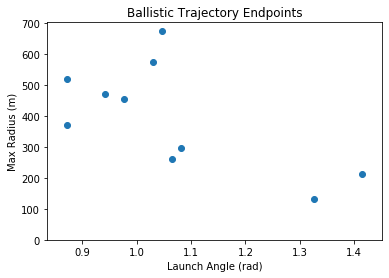

In [6]:
rmaxs = []

# loop that runs calculate_rmax function repeatedly and fills rmaxs list
for ix, (v_i, psi) in enumerate(zip(v_is, psis)):

    rmaxs.append(calculate_rmax(v_i, psi))
    # don't need to put g=, z_i=, z_floor= in because using same default as in function definition

plt.scatter(psis, rmaxs)
plt.title('Ballistic Trajectory Endpoints')
plt.xlabel('Launch Angle (rad)')
plt.ylabel('Max Radius (m)')
plt.yticks(np.arange(0, 800, 100))
plt.show()

# Questions for Katy/Greg

having to rerun all cells or "TypeError: zip argument #1 must support iteration" shows up  
    tried list() and np.nditer() on v_i and psi
    # naming ix, (v_i, psi) changed type from array to float, which can't be iterated over   
    
plt.plot(psi, trajectory) doesn't show points, but plt.scatter(psi, trajectory) does show points   
    # plt.plot defaults to line, and there is no line to be graphed, only individual points

# Next step: Discretize distance between r = 0 and r = r_max

In [7]:
# 2D trajectory function
def calculate_ballistic_trajectory_2d(v_i, psi, g=9.81, z_i=50, z_floor=0, n=100):
    """Return values of elevation"""
    
    rmax=calculate_rmax(v_i, psi, g, z_i, z_floor)
    r = np.linspace(0, rmax, n)
    z = z_i + ((2 * r) / (v_i * np.cos(psi))) * ((v_i * np.sin(psi)) - ((g * r) / (v_i * np.cos(psi))))
    
    return r, z

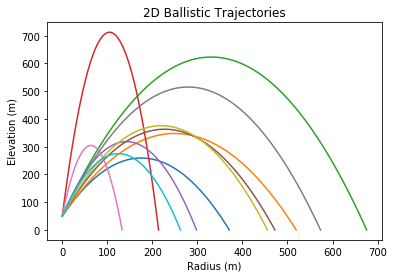

In [8]:
# loop that runs 2D trajectory function and plots (r, z)
for ix, (v_i, psi) in enumerate(zip(v_is, psis)):
    
    r, z = calculate_ballistic_trajectory_2d(v_i, psi)
    # don't need to put g=, z_i=, z_floor=, n= in because using same default as in function definition
    plt.plot(r, z)
    
plt.title('2D Ballistic Trajectories')
plt.xlabel('Radius (m)')
plt.ylabel('Elevation (m)')
plt.show()

# Next step: Include azimuth and x_i, y_i, and z_i to create 3D trajectories

In [9]:
# 3D trajectory function
def calculate_ballistic_trajectory_3d(v_i, psi, theta, g=9.81, x_i=0, y_i=0, z_i=0, z_floor=0.0, n=100):
    """Return values of elevation"""
    
    if n<2:
        raise ValueError("n must be greater than 2")
        
    rmax=calculate_rmax(v_i, psi, g=g, z_i=z_i, z_floor=z_floor)
    r = np.linspace(0, rmax, n)
    z = z_i + ((2 * r) / (v_i * np.cos(psi))) * ((v_i * np.sin(psi)) - ((g * r) / (v_i * np.cos(psi))))
    x = x_i + r*np.cos(theta)
    y = y_i + r*np.sin(theta)
    
    return x, y, z

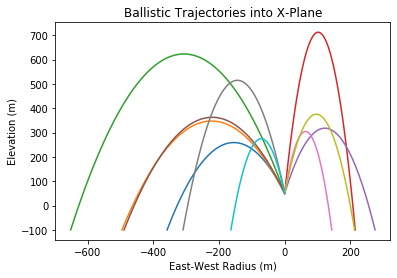

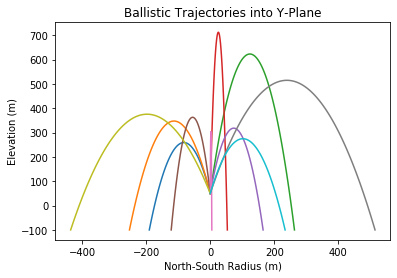

In [10]:
# loop that runs 3D trajectory function and plots (x, z)
# don't need to put g=, n= in because using same default as in function definition
for ix, (v_i, psi, theta) in enumerate(zip(v_is, psis, thetas)):
    
    x, y, z = calculate_ballistic_trajectory_3d(v_i, psi, theta, z_i=50, z_floor=-100)
    plt.plot(x, z)
    
plt.title('Ballistic Trajectories into X-Plane')
plt.xlabel('East-West Radius (m)')
plt.ylabel('Elevation (m)')
plt.show()



# loop that runs 3D trajectory function and plots (y, z)
for ix, (v_i, psi, theta) in enumerate(zip(v_is, psis, thetas)):
    
    x, y, z = calculate_ballistic_trajectory_3d(v_i, psi, theta, z_i=50, z_floor=-100)
    plt.plot(y, z)
    
plt.title('Ballistic Trajectories into Y-Plane')
plt.xlabel('North-South Radius (m)')
plt.ylabel('Elevation (m)')
plt.show()

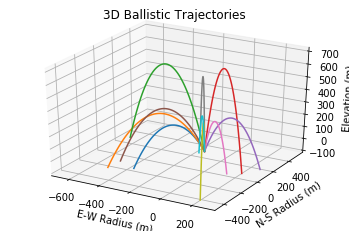

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# loop that runs 3D trajectory function and prints (x, y, z)
for ix, (v_i, psi, theta) in enumerate(zip(v_is, psis, thetas)):
    
    rmax=calculate_rmax(v_i, psi, g=9.81, z_i=50, z_floor=-100)
    x, y, z = calculate_ballistic_trajectory_3d(v_i, psi, theta, z_i=50, z_floor=-100)
    ax.plot(x, y, z)
    
plt.title('3D Ballistic Trajectories')
ax.set_xlabel('E-W Radius (m)')
ax.set_ylabel('N-S Radius (m)')
ax.set_zlabel('Elevation (m)')
plt.show()

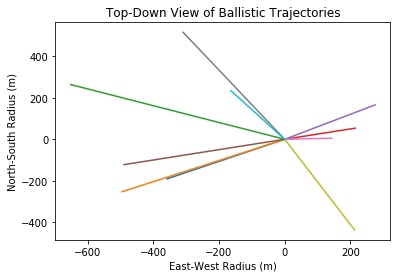

In [12]:
# loop that runs 3D trajectory function and plots (x, y)
for ix, (v_i, psi, theta) in enumerate(zip(v_is, psis, thetas)):
  
    rmax=calculate_rmax(v_i, psi, g=9.81, z_i=50, z_floor=-100)
    x, y, z = calculate_ballistic_trajectory_3d(v_i, psi, theta, z_i=50, z_floor=-100)
    plt.plot(x, y)
    
plt.title('Top-Down View of Ballistic Trajectories')
plt.xlabel('East-West Radius (m)')
plt.ylabel('North-South Radius (m)')
plt.show()